In [1]:
import numpy as np
import matplotlib.pyplot as plt

System consists of running function which runs according to bp distribution of actions

In [2]:
class System:
    def __init__(self, action_reward_bernoulli_probability):
        self.action_reward_bernoulli_probability = action_reward_bernoulli_probability
        
    def run_once(self, action):
        reward = 0
        if np.random.rand() <= self.action_reward_bernoulli_probability[action]:
            reward = 1
        return reward

Agent has to find action and update qhat.

In [3]:
class Agent:
    def __init__(self, epsilon, num_actions, q_hat_initial):
        self.epsilon = epsilon
        self.num_actions = num_actions
        self.q_hat = q_hat_initial
        self.Na = np.zeros(num_actions)
        
    def update_qhat(self, current_action, current_reward):
        current_action = current_action
        self.Na[current_action] = self.Na[current_action] + 1
        self.q_hat[current_action] = self.q_hat[current_action] + 1.0/(self.Na[current_action]) * (current_reward - self.q_hat[current_action])
        
    def find_action(self, time = 1.0):
        current_action = 0
        # if np.random.rand() < self.epsilon / np.log(time + 1):
        if np.random.rand() < self.epsilon:
            current_action = np.random.choice(self.num_actions)
        else:
            current_action = np.argmax(self.q_hat)
        return current_action

for t in time: find action, find reward from system, make note of reward, and update qhat.

In [7]:
max_time = 1000
action_reward_bernoulli_probability = [0.24, 0.54]
num_actions = len(action_reward_bernoulli_probability)

system = System(action_reward_bernoulli_probability)

q_hat_initial = np.zeros(num_actions)
e_greedy_agent = Agent(0.5, num_actions, q_hat_initial)

# reward_store = np.zeros((1, max_time))
reward_store = np.zeros(max_time)

for t in range(max_time):
    current_action = e_greedy_agent.find_action(time = t + 1)
    current_reward = system.run_once(current_action)
    reward_store[t] = current_reward
    e_greedy_agent.update_qhat(current_action, current_reward)
    # print(current_action, current_reward, e_greedy_agent.q_hat)
    
cumulative_reward = np.cumsum(reward_store)
print(e_greedy_agent.q_hat)

[0.23137255 0.54228188]


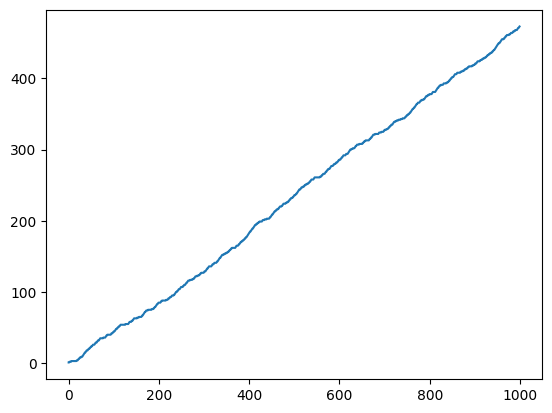

In [5]:
%matplotlib inline
plt.plot(range(max_time), cumulative_reward)